### Librerias

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

### Parametros de la distribucion Poisson

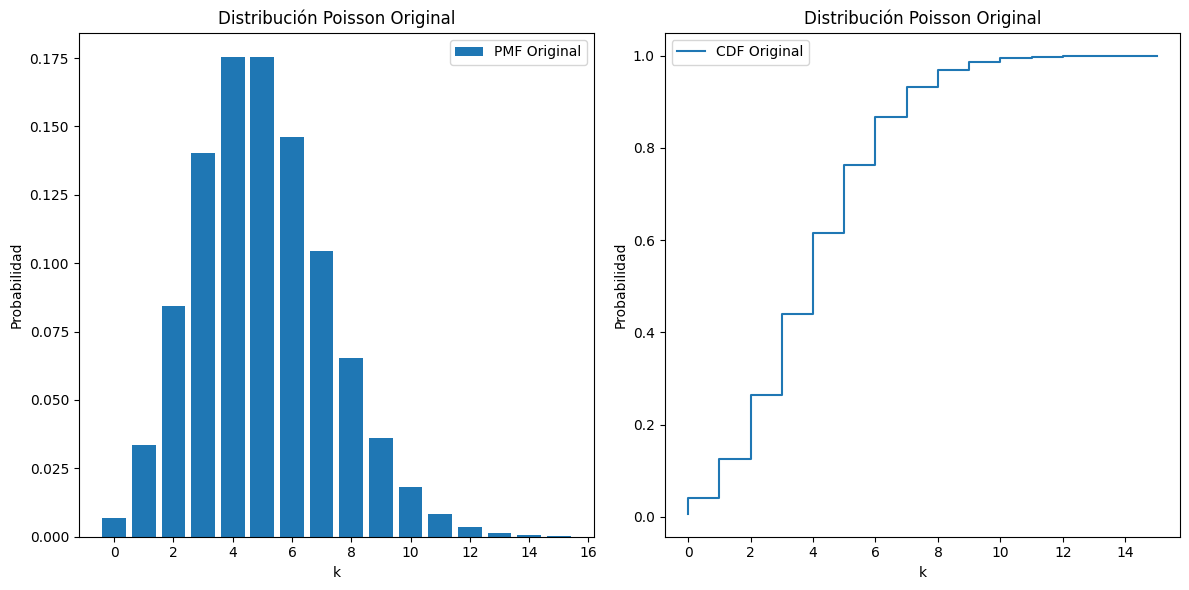

Probabilidad en Poisson original (k entre 4 y 8): 0.6668804499807893


In [153]:
# Parámetro de la distribución Poisson
mu = 5

# Rango de valores para la distribución original
x = np.arange(0, 16)
dist_poisson_original = poisson(mu)
pmf_original = dist_poisson_original.pmf(x)
cdf_original = dist_poisson_original.cdf(x)

# Graficar la PMF original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(x, pmf_original, label="PMF Original")
plt.title("Distribución Poisson Original")
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.step(x, cdf_original, label="CDF Original")
plt.title("Distribución Poisson Original")
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()

plt.tight_layout()
plt.show()

# Calcular la probabilidad en la Poisson original para k entre 4 y 8
k_event = np.arange(4, 9)  # 4, 5, 6, 7 y 8
p_original = poisson.pmf(k_event, mu).sum()
print("Probabilidad en Poisson original (k entre 4 y 8):", p_original)

[ 3.  4.  5.  6.  7.  8.  9. 10.]


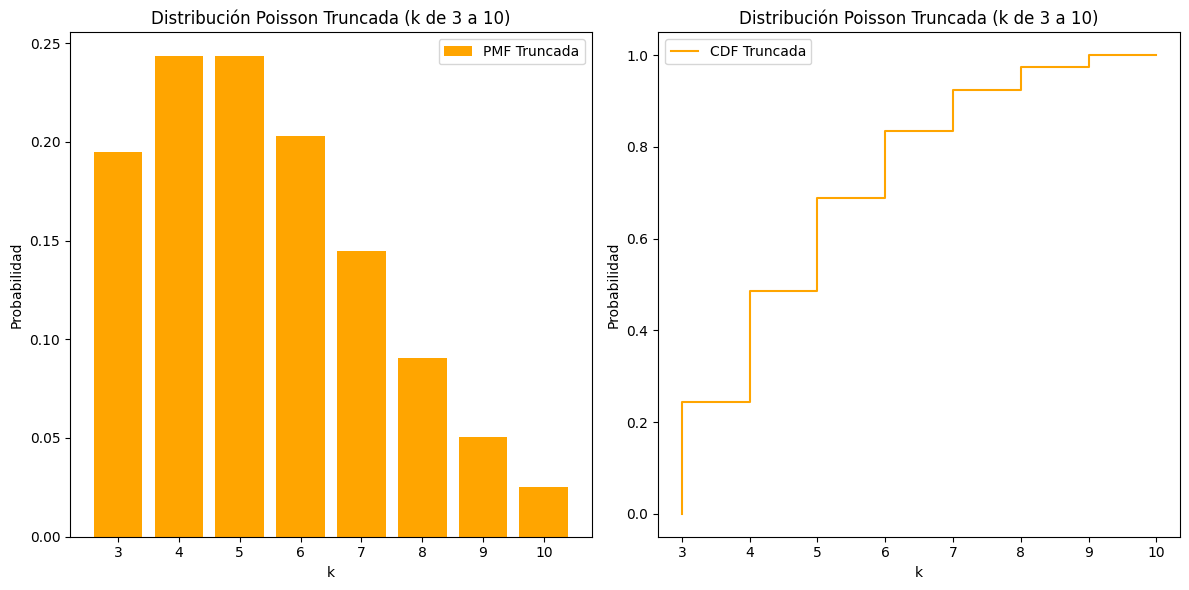

In [ ]:

# --- Proceso de truncamiento ---
# Definimos el intervalo de truncamiento, por ejemplo, de k = 3 a k = 10
k_min = 3
k_max = 10

cdf_min = dist_poisson_original.cdf(k_min)
cdf_max = dist_poisson_original.cdf(k_max)
norm_const = cdf_max - cdf_min  # constante de normalización

x_trunc = np.linspace(k_min, k_max, k_max-k_min+1) # rango de valores truncados
print(x_trunc)
pdf_trunc = dist_poisson_original.pmf(x_trunc) / norm_const
cdf_trunc = (dist_poisson_original.cdf(x_trunc) - dist_poisson_original.cdf(k_min)) / norm_const

def cdf_truncada(k):
    if k < k_min:
        return 0
    elif k > k_max:
        return 1
    else:
        return (dist_poisson_original.cdf(k) - cdf_min) / norm_const

# Graficar la PMF truncada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(x_trunc, pdf_trunc, label="PMF Truncada", color="orange")
plt.title("Distribución Poisson Truncada (k de {} a {})".format(k_min, k_max))
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.step(x_trunc, cdf_trunc, label="CDF Truncada", color="orange")
plt.title("Distribución Poisson Truncada (k de {} a {})".format(k_min, k_max))
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Calcular la probabilidad en la Poisson original para k entre 4 y 8
k_event = np.arange(4, 9)  # 4, 5, 6, 7 y 8
p_original = dist_poisson_original.cdf(8) - dist_poisson_original.cdf(3) # va de 3 a 8 porque es discreta
print("Probabilidad en Poisson original (k entre 4 y 8):", p_original)

# Calcular la probabilidad en la Poisson truncada para k entre 4 y 8
# norm_const ya contiene la suma de las PMF en el intervalo truncado [k_min, k_max] (en este caso 3 a 10)
p_event = poisson.pmf(k_event, mu).sum()
p_trunc = p_event / norm_const
print("Probabilidad en Poisson truncada (k entre 4 y 8):", p_trunc)


Probabilidad en Poisson original (k entre 4 y 8): 0.6668804499807901
Probabilidad en Poisson truncada (k entre 4 y 8): 0.9245806685169534
